# Predicting cloud cover using neural networks

In [1]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

from model_comparison import model_comparison
from resample import resample
import algorithms
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as n
from sklearn.linear_model import LinearRegression
#from mpl_toolkits.axes_grid1 import make_axes_locatable

from utils import train_test_split
%matplotlib inline
#%matplotlib notebook

from deepNN import NeuralNetRegressor

from sklearn.neural_network import MLPRegressor
from utils import mean_squared_error, A_R2, NRMSE, transforming_predictorspace, standardicing_responce

from sklearn.preprocessing import StandardScaler

import itertools

In [2]:
# reading test
path = "./files/"
filenames = ["specific_humidity_Europa_sp.nc", "relative_humidity_Europa_sp.nc", "pressure_Europa_sp.nc",  
             "temperature_Europa_sp.nc", "total_cloud_cover_Europa_sp.nc"]


cloud = n.Dataset(path + filenames[-1], "r")
relative = n.Dataset(path + filenames[1], "r")
specific = n.Dataset(path + filenames[0], "r")
pressure = n.Dataset(path + filenames[2], "r")
temperature = n.Dataset(path + filenames[3], "r")

In [3]:
#print(cloud.variables)
tcc = cloud.variables["tcc"][:][:][:].data

# Retriving ground values, these are available at six different pressure levels. 
rel = relative.variables["r"][:][:][:][:].data
#level = relative.variables["level"][:][0].data
spe = specific.variables["q"][:][:][:][:].data

surf_pre = pressure.variables["sp"][:][:][:].data
temp = temperature.variables["t2m"][:][:][:].data

In [4]:
def logit_inv(x): # sigmoid?
    return np.exp(x)/(1+np.exp(x))

def logit(x):
    return np.log((x + 1e-12)/(1+1e-12 - x))

In [5]:
# for one certain timestep 

n_days = 7

TCC = []
REL = []
SPE = []
PRE = []
TEMP = []


for t in range(int(n_days*4)):
    TCC.append(tcc[t][:][:].flatten())
    REL.append(rel[t][0][:][:].flatten())
    SPE.append(spe[t][0][:][:].flatten())
    PRE.append(surf_pre[t][:][:].flatten())
    TEMP.append(temp[t][:][:].flatten())


In [6]:
y =(np.array(TCC).flatten())
temp = y[y<1]
y[y>1] = temp.max()
print(y.min()>0)

X = np.array([np.array(REL).flatten(), np.array(SPE).flatten(), np.array(PRE).flatten(), np.array(TEMP).flatten()])
y = logit(np.array(TCC).flatten())

True


In [7]:
np.array(TCC).min(), np.array(TCC).max()

(9.99866855977416e-13, 1.0000000000009999)

In [8]:
y.min(), y.max()

(-26.93794050959591, 36.04365338911916)

In [9]:
np.shape(X[0]),np.shape(X[1]),np.shape(X[2]),np.shape(X[3]), np.shape(y)

((131516,), (131516,), (131516,), (131516,), (131516,))

In [10]:
y = y.reshape((len(y),1))
X = X.T

In [11]:
np.shape(X), np.shape(y)

((131516, 4), (131516, 1))

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, split_size = 0.2)
import sklearn.model_selection as s
X_train, X_test, y_train, y_test = s.train_test_split(X, y, test_size = 0.2)

"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fit = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nfit = scaler.fit(X_train)\n\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)'

In [13]:
np.shape(X_train), np.shape(X_test), np.shape(y_train),  np.shape(y_test)

((105212, 4), (26304, 4), (105212, 1), (26304, 1))

In [14]:
y_train.max(), y_train.min()

(36.04365338911916, -26.93794050959591)

# ONE HIDDEN LAYER

In [41]:
nr_epochs = 100

n_nodes = [10,30,50,100, 500]

# Array which contains all the "calibrated models ".
results = []

for n in n_nodes:
    model = NeuralNetRegressor(n_hidden = [n],  
                               epochs=nr_epochs, 
                               eta=0.001, # larger eta results in exploding gradients, becomes NaN.
                               shuffle=True, 
                               batch_size=10,
                               seed=None, 
                               alpha=0.0001, # dette er for relu ikke det samme som penaltien i scikit learn  
                               activation='sigmoid')

    p = model.fit(X_train, y_train, X_test, y_test)
    model.predict(X_test)
    results.append(p)

# Transformin the predictor space, standardizing the response, calculating the performance metrics
# This is done in the neural network 

[nan, 2.0000000000000004, 2.0, 2.0000000000000004, 2.0, 2.0000000000000004, 2.0, 2.0, 2.0000000000000004, nan, 2.0, 2.0, 2.0, 2.0, 2.0, nan, 2.0000000000000004, 2.0, 2.0, 2.0000000000000004, 2.0, 2.0, 2.0, 2.0, nan, 2.0000000000000004, 2.0000000000000004, 2.0000000000000004, 2.0000000000000004, 2.0000000000000004, nan, 2.0000000000000004, 2.0000000000000004, 2.0000000000000004, nan, nan, nan, nan, 2.0000000000000004, 2.0, 2.0000000000000004, 2.0, 2.0, 2.0, 2.0000000000000004, 2.0000000000000004, nan, nan, nan, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0000000000000004, 2.0, 2.0, 2.0, 2.0, nan, 2.0000000000000004, 2.0, 2.0000000000000004, 2.0000000000000004, 2.0, 2.0000000000000004, 2.0, nan, 2.0, 2.0000000000000004, 2.0, 2.0, nan, 2.0000000000000004, 2.0, 2.0000000000000004, 2.0000000000000004, 2.0000000000000004, nan, nan, 2.0000000000000004, 2.0, 2.0000000000000004, 2.0, 2.0000000000000004, 2.0000000000000004, nan, 2.0, 2.0000000000000004, 2.0, 2.0, 2.0, 2.0, 2.000000000000

/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/ha

Text(0.5,0,'Epochs')

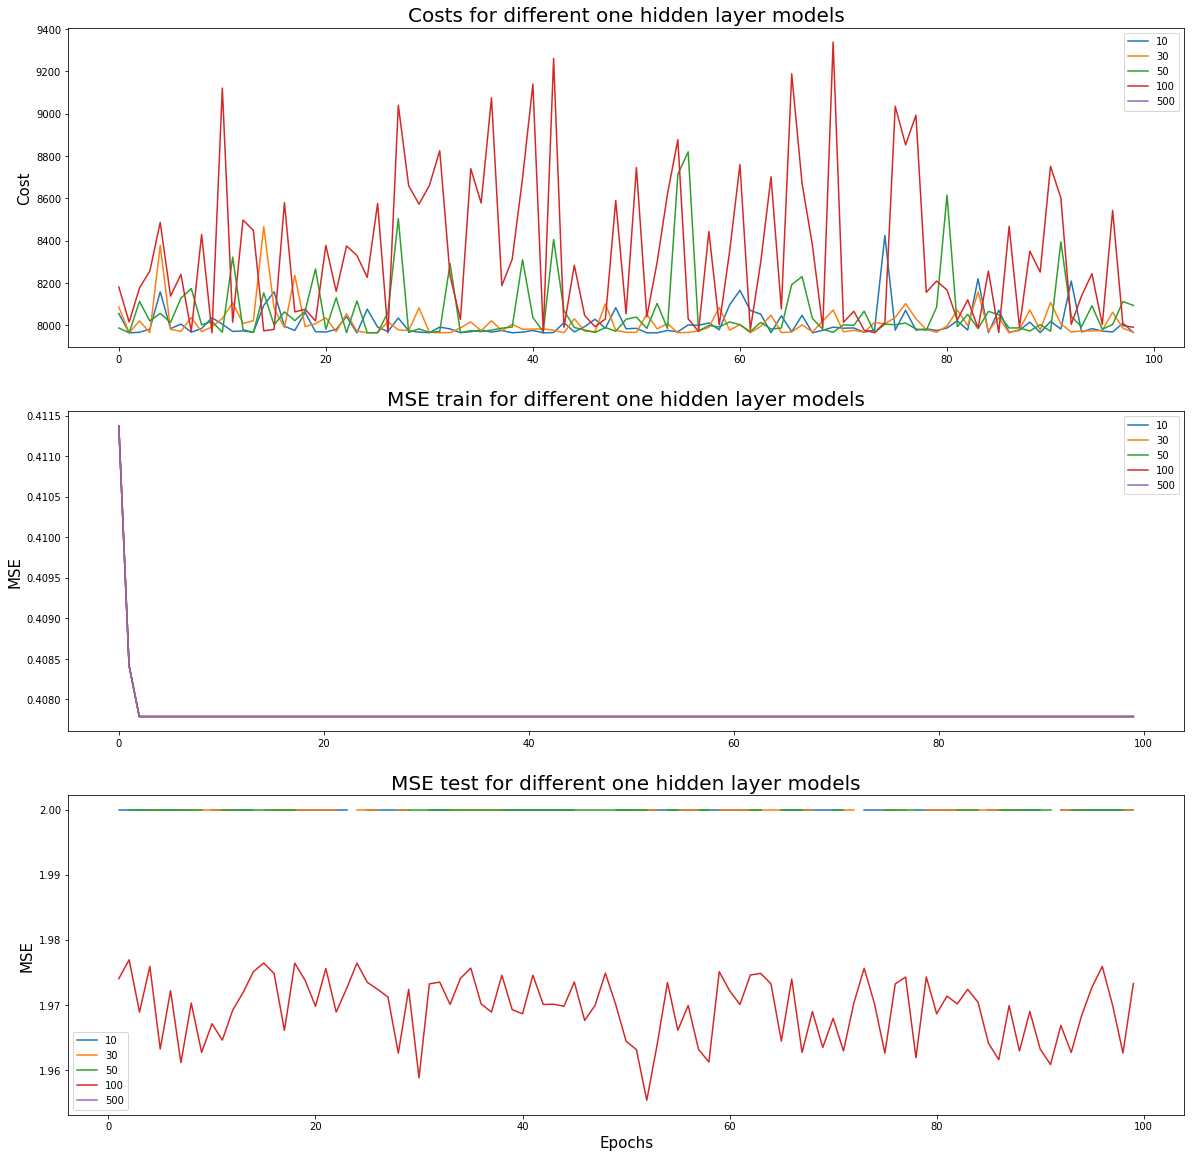

In [42]:
# Plot results as a function of  epochs to see if a certain nr of nodes makes a difference. 

plt.figure(figsize = (20,20))



counter = 0
for model in results:
    mse_train = model.eval_['train_preform']
    mse_test = model.eval_['valid_preform']
    cost_train = model.eval_["cost_train"]

    ax1 = plt.subplot(311)
    plt.plot(cost_train[1:], label = str(n_nodes[counter])) 
    plt.title("Costs for different one hidden layer models", fontsize = 20)
    plt.ylabel("Cost", fontsize = 15)
    plt.legend()
    
    # Alle disse blir like.
    ax2 = plt.subplot(312)
    plt.plot(mse_train, label = str(n_nodes[counter])) 
    plt.title("MSE train for different one hidden layer models", fontsize = 20)
    plt.ylabel("MSE", fontsize = 15)
    plt.legend()
    
    # Hvorfor blir en del av diss nan....?
    ax3 = plt.subplot(313)
    plt.plot(mse_test, label = str(n_nodes[counter])) 
    plt.title("MSE test for different one hidden layer models", fontsize = 20)
    plt.ylabel("MSE", fontsize = 15)
    plt.legend()
    
    counter += 1
    


plt.xlabel("Epochs", fontsize = 15)

In [17]:
#np.mean(p.eval_['train_preform'])

In [18]:
#np.nanmean(p.eval_['valid_preform']) 
# Use np.nanmean because som of the mse values return nan

In [36]:
#np.mean(p.eval_['cost_train'][3:])

# Deep neural net - three hidden layers 

In [55]:
n_nodes = [10, 50, 100, 150]
# fire faktultet = 24
# fem faktultet = 121

#eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
#lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]
#epochs = [10,50,100]
#batch_s = [1,10,50]

"""
Anything less than a houndred epochs doesn't show much...
Can checkout batchsize later!
"""

results = []

permutations_of_nodes = list(itertools.permutations(n_nodes))

for per in permutations_of_nodes:

    architecture = list(per)
    model = NeuralNetRegressor(n_hidden = architecture,
                               epochs=100, 
                               eta=0.001, 
                               shuffle=True, 
                               batch_size=10,
                               seed=None, 
                               alpha=0.0001, # dette er for relu ikke det samme som penaltien i scikit learn  
                               activation='sigmoid')

    p = model.fit(X_train, y_train, X_test, y_test)
    model.predict(X_test)
    print("finished model : " + str(architecture) )
    
    results.append(p)

finished model : [10, 50, 100, 150]
finished model : [10, 50, 150, 100]
finished model : [10, 100, 50, 150]
finished model : [10, 100, 150, 50]
finished model : [10, 150, 50, 100]
finished model : [10, 150, 100, 50]
finished model : [50, 10, 100, 150]
finished model : [50, 10, 150, 100]
finished model : [50, 100, 10, 150]
finished model : [50, 100, 150, 10]
finished model : [50, 150, 10, 100]
finished model : [50, 150, 100, 10]
finished model : [100, 10, 50, 150]
finished model : [100, 10, 150, 50]
finished model : [100, 50, 10, 150]
finished model : [100, 50, 150, 10]
finished model : [100, 150, 10, 50]
finished model : [100, 150, 50, 10]
finished model : [150, 10, 50, 100]
finished model : [150, 10, 100, 50]
finished model : [150, 50, 10, 100]
finished model : [150, 50, 100, 10]
finished model : [150, 100, 10, 50]
finished model : [150, 100, 50, 10]


/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/ha

/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/ha

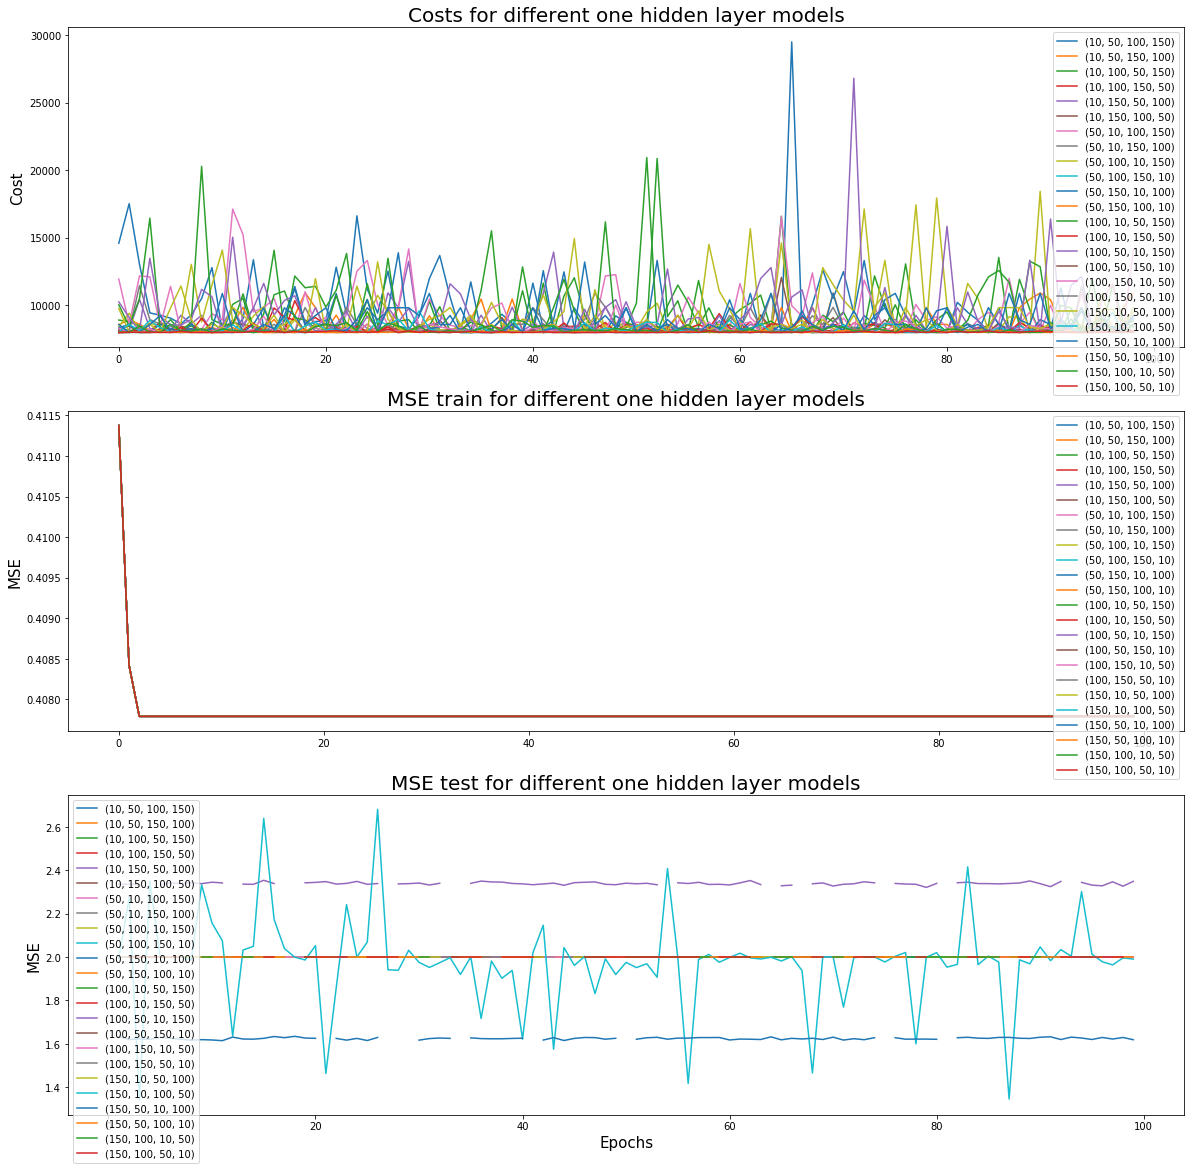

In [56]:
plt.figure(figsize = (20,20))

counter = 0
for model in results:
    mse_train = model.eval_['train_preform']
    mse_test = model.eval_['valid_preform']
    cost_train = model.eval_["cost_train"]

    ax1 = plt.subplot(311)
    plt.plot(cost_train[1:], label = str(permutations_of_nodes[counter])) 
    plt.title("Costs for different one hidden layer models", fontsize = 20)
    plt.ylabel("Cost", fontsize = 15)
    plt.legend()
    
    # Alle disse blir like.
    ax2 = plt.subplot(312)
    plt.plot(mse_train, label = str(permutations_of_nodes[counter])) 
    plt.title("MSE train for different one hidden layer models", fontsize = 20)
    plt.ylabel("MSE", fontsize = 15)
    plt.legend()
    
    # Hvorfor blir en del av diss nan....?
    ax3 = plt.subplot(313)
    plt.plot(mse_test, label = str(permutations_of_nodes[counter])) 
    plt.title("MSE test for different one hidden layer models", fontsize = 20)
    plt.ylabel("MSE", fontsize = 15)
    plt.legend()
    
    counter += 1
    
plt.xlabel("Epochs", fontsize = 15)
plt.savefig("results/figures/threeHiddenLayers_all_permutations.png")

In [52]:
#permutations_of_nodes = list(itertools.permutations(n_nodes))

#list(permutations_of_nodes[0])

[10, 30, 50, 100, 500]

In [ ]:
#mse_test = p.eval_['valid_preform']
#mse_train = p.eval_['train_preform']
#np.mean(mse_train), np.nanmean(mse_test)

In [57]:
"""
tr = p.eval_['cost_train']
te = p.eval_['cost_test']

x = np.arange(100)
temp = []
temp2 = []
for i in range(len(x)):
    temp.append(tr[i][0][0])
    temp2.append(te[i][0][0])

plt.figure(figsize = (20,10))
plt.plot(x[1:],temp[1:], label = "cost train")
#plt.plot(x,temp2, label = "cost test")
plt.legend()
plt.title("Three hidden layers [500,50,100], cost vs epochs without feature scaling ", fontsize = 20)
plt.savefig("results/figures/cost_nn_two_layers.png")"""

'\ntr = p.eval_[\'cost_train\']\nte = p.eval_[\'cost_test\']\n\nx = np.arange(100)\ntemp = []\ntemp2 = []\nfor i in range(len(x)):\n    temp.append(tr[i][0][0])\n    temp2.append(te[i][0][0])\n\nplt.figure(figsize = (20,10))\nplt.plot(x[1:],temp[1:], label = "cost train")\n#plt.plot(x,temp2, label = "cost test")\nplt.legend()\nplt.title("Three hidden layers [500,50,100], cost vs epochs without feature scaling ", fontsize = 20)\nplt.savefig("results/figures/cost_nn_two_layers.png")'

# Så langt gir et lag med 10 best resultat .... 

# Using feature scaling in an attempt to make sgd converge

# Teste samme med standard scaler

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fit = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


n_nodes = [10, 50, 100, 150]

results = []

permutations_of_nodes = list(itertools.permutations(n_nodes))

for per in permutations_of_nodes:
    model = NeuralNetRegressor(n_hidden = list(per),  
                               epochs=100, 
                               eta=0.001, 
                               # empty plot --> to large eta results in NaN values. 
                               shuffle=True, 
                               batch_size=10,
                               seed=None, 
                               alpha=0.0001, # dette er for relu ikke det samme som penaltien i scikit learn  
                               activation='sigmoid')

    p = model.fit(X_train, y_train, X_test, y_test)
    model.predict(X_test)
    results.append(p)


/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/ha

/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/ha

/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/ha

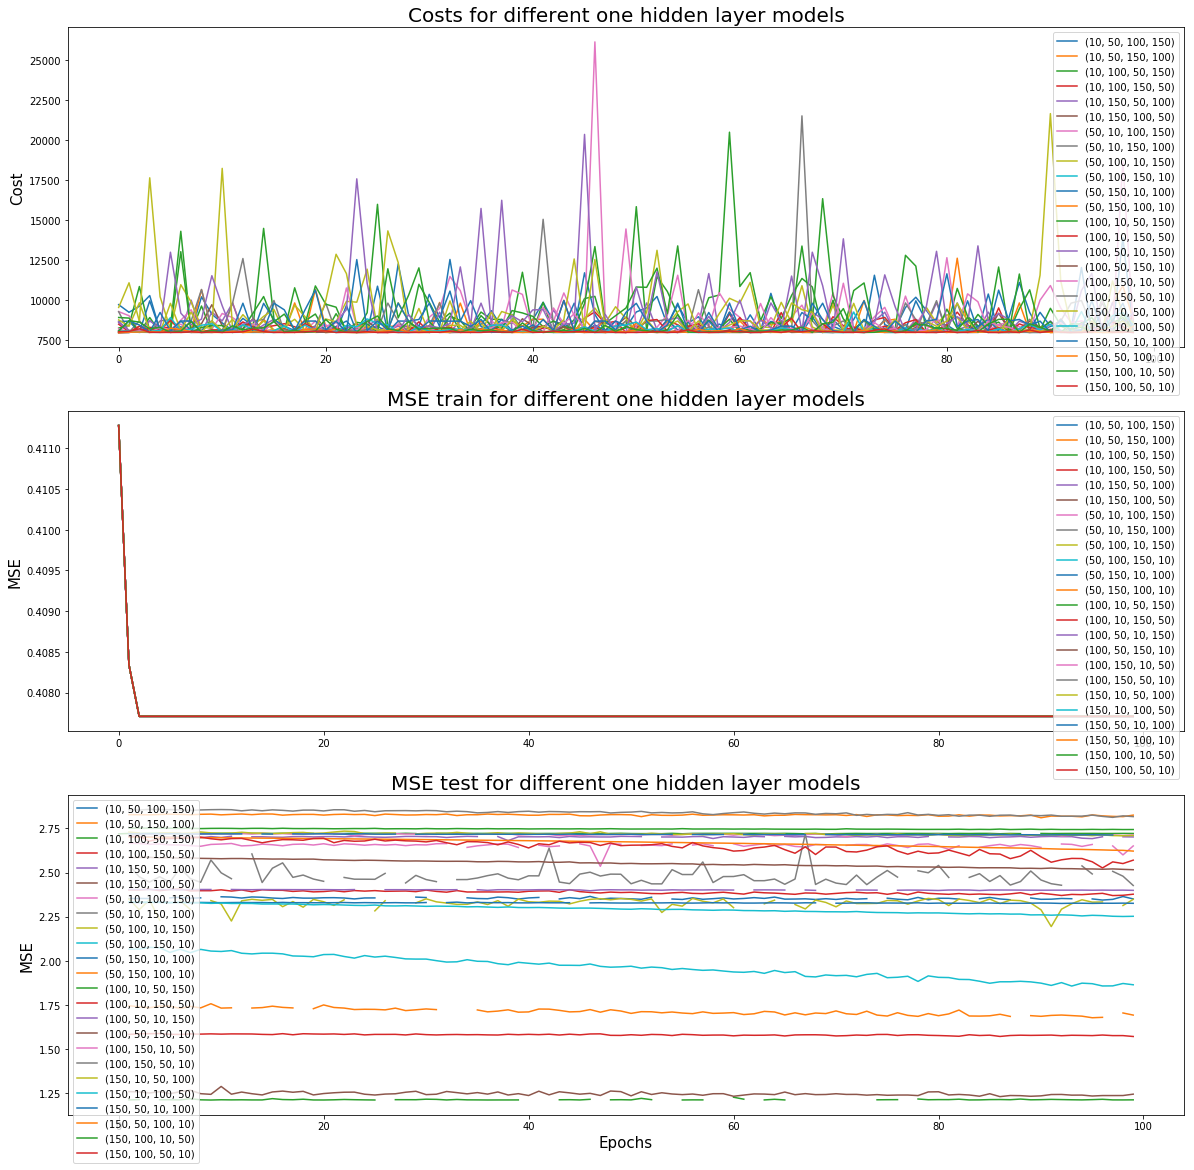

In [59]:
plt.figure(figsize = (20,20))

counter = 0
for model in results:
    mse_train = model.eval_['train_preform']
    mse_test = model.eval_['valid_preform']
    cost_train = model.eval_["cost_train"]

    ax1 = plt.subplot(311)
    plt.plot(cost_train[1:], label = str(permutations_of_nodes[counter])) 
    plt.title("Costs for different one hidden layer models", fontsize = 20)
    plt.ylabel("Cost", fontsize = 15)
    plt.legend()
    
    # Alle disse blir like.
    ax2 = plt.subplot(312)
    plt.plot(mse_train, label = str(permutations_of_nodes[counter])) 
    plt.title("MSE train for different one hidden layer models", fontsize = 20)
    plt.ylabel("MSE", fontsize = 15)
    plt.legend()
    
    # Hvorfor blir en del av diss nan....?
    ax3 = plt.subplot(313)
    plt.plot(mse_test, label = str(permutations_of_nodes[counter])) 
    plt.title("MSE test for different one hidden layer models", fontsize = 20)
    plt.ylabel("MSE", fontsize = 15)
    plt.legend()
    
    counter += 1
    
plt.xlabel("Epochs", fontsize = 15)
plt.savefig("results/figures/threeHiddenLayers_all_permutations_feature_scales.png")

In [ ]:
#mse_test = p.eval_['valid_preform']
#mse_train = p.eval_['train_preform']

In [ ]:
#p.eval_['cost_train']

# Using standard scaler creates the smallest mse so far - 1.25!!! Everything else has been around 1.96 at the best (Y) 


# Attempting to do the same for Hidden layers with standard scaler

In [61]:
n_1 = [10, 50, 100]
n_2 = [10, 50, 150]
n_3 = [50, 100, 150]
n_4 = [10, 100, 150]


results = []

permutations_of_nodes = list(itertools.permutations(n_1)) + list(itertools.permutations(n_2)) \
+ list(itertools.permutations(n_3))+ list(itertools.permutations(n_4))

for per in permutations_of_nodes:
    model = NeuralNetRegressor(n_hidden = list(per),  
                               epochs=100, 
                               eta=0.001,
                               shuffle=True, 
                               batch_size=10,
                               seed=None, 
                               alpha=0.0001, # Dette er for relu ikke det samme som penaltien i scikit learn  
                               activation='sigmoid')

    p = model.fit(X_train, y_train, X_test, y_test)
    model.predict(X_test)
    results.append(p)


/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/ha

/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/hannasv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/uio/hume/student-u89/ha

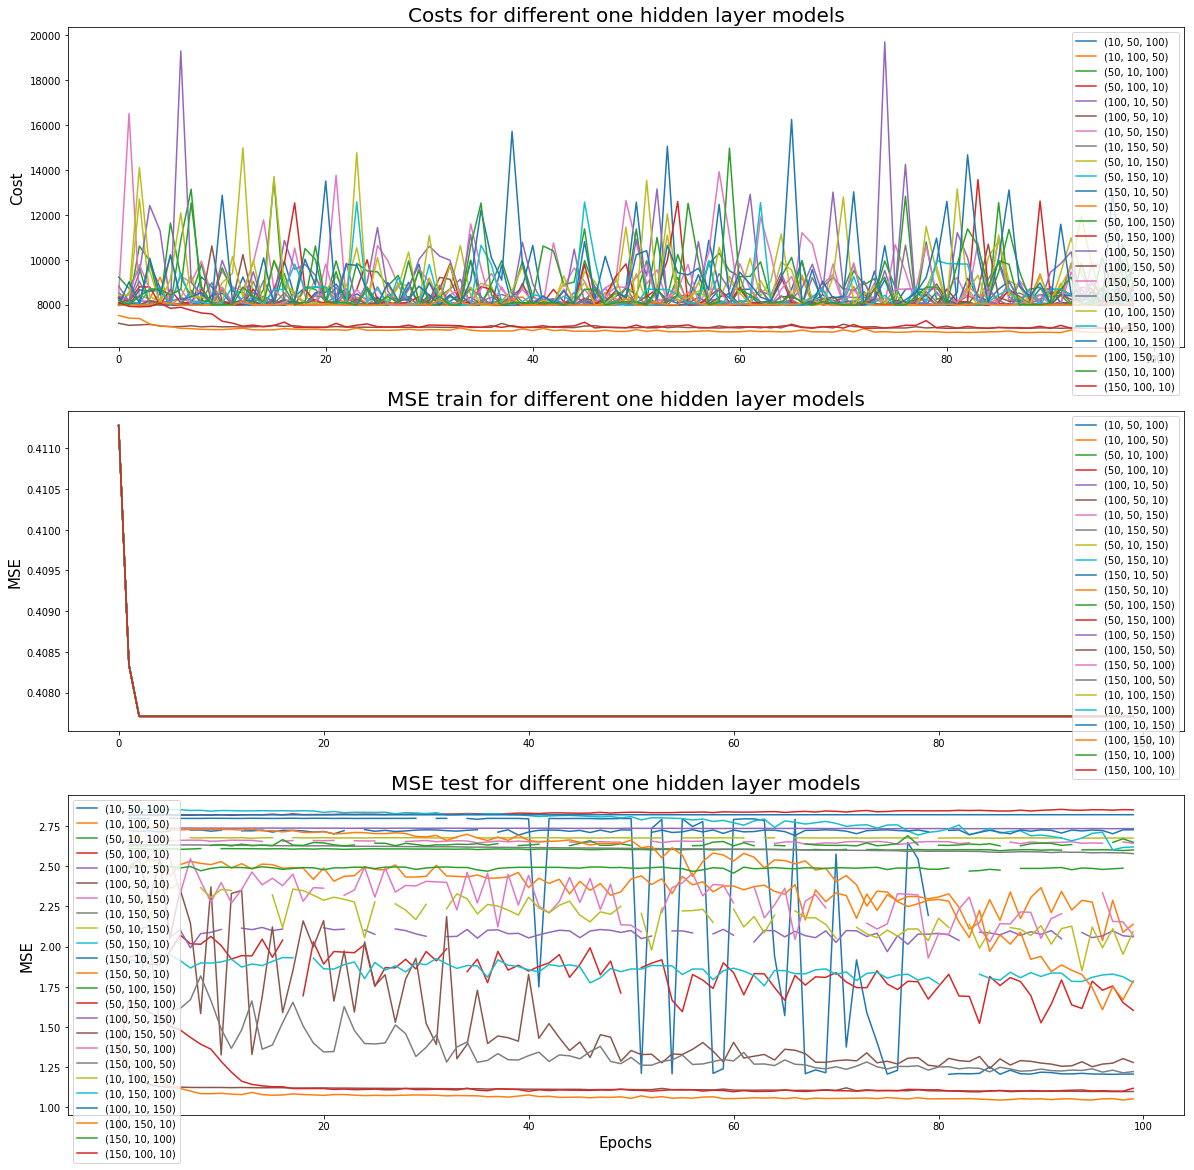

In [62]:
plt.figure(figsize = (20,20))

counter = 0
for model in results:
    mse_train = model.eval_['train_preform']
    mse_test = model.eval_['valid_preform']
    cost_train = model.eval_["cost_train"]

    ax1 = plt.subplot(311)
    plt.plot(cost_train[1:], label = str(permutations_of_nodes[counter])) 
    plt.title("Costs for different one hidden layer models", fontsize = 20)
    plt.ylabel("Cost", fontsize = 15)
    plt.legend()
    
    # Alle disse blir like.
    ax2 = plt.subplot(312)
    plt.plot(mse_train, label = str(permutations_of_nodes[counter])) 
    plt.title("MSE train for different one hidden layer models", fontsize = 20)
    plt.ylabel("MSE", fontsize = 15)
    plt.legend()
    
    # Hvorfor blir en del av diss nan....?
    ax3 = plt.subplot(313)
    plt.plot(mse_test, label = str(permutations_of_nodes[counter])) 
    plt.title("MSE test for different one hidden layer models", fontsize = 20)
    plt.ylabel("MSE", fontsize = 15)
    plt.legend()
    
    counter += 1
    
plt.xlabel("Epochs", fontsize = 15)
plt.savefig("results/figures/threeHiddenLayers_all_permutations_feature_scales_Dette_er_tre.png")

# Scikit MLP Regressor using one hidden layer

In [ ]:
#n_nodes = [10,30,50,100, 500]
"""
eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]
#epochs = [10,50,100] Scikit stopper på rett antall epochs
batch_s = [1,10,50]

# Scikit uses a different shape than we have implemented in our neural network.
y_train = y_train.ravel()




#for e in epochs:

for b in batch_s:
    for et in eta:
        for l in lmd:
            mlp = MLPRegressor(hidden_layer_sizes=(30,), 
                               activation = 'relu', # identity’, ‘logistic’, ‘tanh’, ‘relu’
                               solver = "adam", 
                               alpha = l, # penalty
                               batch_size = b, 
                               learning_rate_init = et)

            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test)
            #logistic activation uses the sigmoid function 
            
            
            # NEED TO TRANSFORM AND NORMALIZE THE RESULT. 
            #mse = NRMSE(y_pred, y_test)
            #ajusted_r2 = A_R2(y_pred, y_test, n, p)
            print(" eta : " + str(et) + " lmd "+ str(l) +"    batch size : " +  str(b)   + "   mse is " + str(mse) + " a r2  " + str(ajusted_r2))
            """